In [1]:
#import library
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [2]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)    

train_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/faceanh/train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=10,
                                                 directory='../input/testanh/test',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 84 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


In [3]:
# X_train.shape, y_train.shape,X_test.shape,y_test.shape
train_dataset.classes
train_dataset.class_indices

{'loi': 0, 'manh': 1, 'tai': 2}

In [4]:
import numpy as np  
import pandas as pd # xu ly mang
import seaborn as sns # do thi
import matplotlib.pyplot as plt # ve do hoa
from sklearn.preprocessing import StandardScaler  # xu ly du lieu , du lieu k dong deu
from sklearn.model_selection import train_test_split # chia du lieu 
from keras.layers import Dense,Activation,Dropout,BatchNormalization,LSTM # chuan cua ANN
from keras.models import Sequential #
from tensorflow.keras.utils import to_categorical #  de dam bao do chinh xac cao 
from keras import callbacks #
from sklearn .metrics import  precision_score,recall_score, confusion_matrix, classification_report, accuracy_score,f1_score # thu vien cho do luong


In [5]:
# Tạo mô hinh
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3))) # 32 lần tích chập
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 64 lần tích chập
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same')) # 128 lần tích chập
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

2022-05-24 07:26:14.895438: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Dùng CNN tách biên và giờ quay trở loại ANN để phân loại
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 128)       7

In [7]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate = 0.001, momentum = 0.9)
model .compile(optimizer = opt, loss ='categorical_crossentropy', metrics = ['accuracy'])

In [8]:
history=model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

2022-05-24 07:26:16.178778: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
9/9 [==============================] - 11s 1s/step - loss: 2.0919 - accuracy: 0.4762 - val_loss: 1.0431 - val_accuracy: 0.3333
Epoch 2/50
9/9 [==============================] - 9s 937ms/step - loss: 0.6913 - accuracy: 0.7143 - val_loss: 0.8089 - val_accuracy: 0.6667
Epoch 3/50
9/9 [==============================] - 9s 938ms/step - loss: 0.3774 - accuracy: 0.8690 - val_loss: 0.6935 - val_accuracy: 0.3333
Epoch 4/50
9/9 [==============================] - 9s 1s/step - loss: 0.3208 - accuracy: 0.8929 - val_loss: 1.3491 - val_accuracy: 0.6667
Epoch 5/50
9/9 [==============================] - 9s 957ms/step - loss: 0.1820 - accuracy: 0.9405 - val_loss: 0.1319 - val_accuracy: 1.0000
Epoch 6/50
9/9 [==============================] - 9s 928ms/step - loss: 0.1194 - accuracy: 0.9762 - val_loss: 0.0734 - val_accuracy: 1.0000
Epoch 7/50
9/9 [==============================] - 9s 956ms/step - loss: 0.0878 - accuracy: 0.9643 - val_loss: 0.4918 - val_accuracy: 0.6667
Epoch 8/50
9/9 [=========

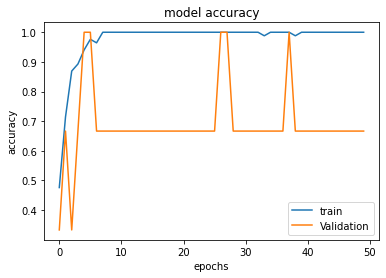

In [9]:
# vẽ lại quá trình học
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [10]:
#in sai số và độ chính xác
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số : ',score[0])
print('Độ chính xác ',score[1])

Sai số :  0.6511831283569336
Độ chính xác  0.6666666865348816


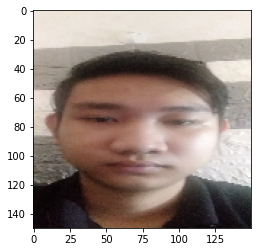

Ho Viet Loi


In [11]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testanh/test/loi/loi (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Ho Viet Loi")
if(kq==1):
    print("Pham Huu Manh")
if(kq==2):
    print("Dang Tan Tai")
      

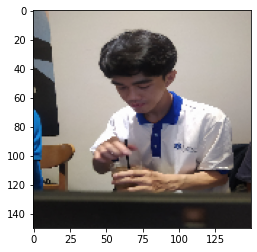

Ho Viet Loi


In [12]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testanh/test/tai/tai (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Ho Viet Loi")
if(kq==1):
    print("Pham Huu Manh")
if(kq==2):
    print("Dang Tan Tai")

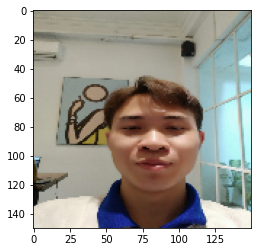

Pham Huu Manh


In [13]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
filename = "../input/testanh/test/manh/manh (1).jpg"

img = load_img(filename,target_size=(150,150))
img_show = plt.imshow(img)
plt.show()
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
kq= np.argmax(model.predict(img),axis=-1)
if(kq==0):
    print("Ho Viet Loi")
if(kq==1):
    print("Pham Huu Manh")
if(kq==2):
    print("Dang Tan Tai")